# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix
from collections import Counter

# Read the dataset

In [2]:
data=pd.read_csv(r"C:\Users\akshi\Documents\data set\Migraine Data.csv")

In [3]:
data.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


# Check data type 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

# check the categories in the ( Dependent variable ) (Type) variable 

In [5]:
data["Type"].unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

# Lable Encoding 

In [6]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data["Type"]=l.fit_transform(data["Type"])

# Split the given data

In [7]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1] 

In [8]:
from collections import Counter
print(Counter(y))

Counter({5: 247, 2: 60, 1: 24, 6: 20, 0: 18, 3: 17, 4: 14})


In [9]:
data.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,...,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000,4.015000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,...,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449,1.651239
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,5.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,6.000000


# Check the null values from the data

In [10]:
data.isnull().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

# Uniqness in the features

In [11]:
data.nunique()

Age            51
Duration        3
Frequency       8
Location        3
Character       3
Intensity       4
Nausea          2
Vomit           2
Phonophobia     2
Photophobia     2
Visual          5
Sensory         3
Dysphasia       2
Dysarthria      2
Vertigo         2
Tinnitus        2
Hypoacusis      2
Diplopia        2
Defect          2
Ataxia          1
Conscience      2
Paresthesia     2
DPF             2
Type            7
dtype: int64

# Check skewness of data 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Frequency'}>,
        <AxesSubplot:title={'center':'Location'}>,
        <AxesSubplot:title={'center':'Character'}>],
       [<AxesSubplot:title={'center':'Intensity'}>,
        <AxesSubplot:title={'center':'Nausea'}>,
        <AxesSubplot:title={'center':'Vomit'}>,
        <AxesSubplot:title={'center':'Phonophobia'}>,
        <AxesSubplot:title={'center':'Photophobia'}>],
       [<AxesSubplot:title={'center':'Visual'}>,
        <AxesSubplot:title={'center':'Sensory'}>,
        <AxesSubplot:title={'center':'Dysphasia'}>,
        <AxesSubplot:title={'center':'Dysarthria'}>,
        <AxesSubplot:title={'center':'Vertigo'}>],
       [<AxesSubplot:title={'center':'Tinnitus'}>,
        <AxesSubplot:title={'center':'Hypoacusis'}>,
        <AxesSubplot:title={'center':'Diplopia'}>,
        <AxesSubplot:title={'center':'Defect'}>,
        <AxesSubplot:title={'c

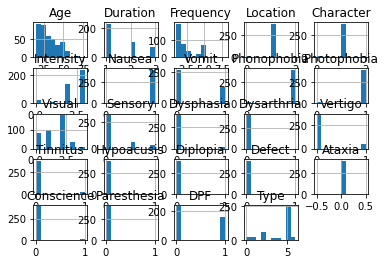

In [12]:
data.hist()

In [13]:
data.skew()

Age             0.819051
Duration        0.798146
Frequency       0.968169
Location       -1.126193
Character      -0.812426
Intensity      -1.697076
Nausea         -8.808753
Vomit           0.762329
Phonophobia    -6.463788
Photophobia    -6.882981
Visual          0.034794
Sensory         1.857410
Dysphasia       4.887189
Dysarthria     20.000000
Vertigo         2.276332
Tinnitus        3.719431
Hypoacusis      8.010163
Diplopia       14.088736
Defect          8.010163
Ataxia          0.000000
Conscience      7.387124
Paresthesia    11.459712
DPF             0.367357
Type           -1.084781
dtype: float64

# Classes of dependent variable

In [14]:
data["Type"].unique()

array([5, 2, 0, 4, 1, 3, 6])

# Detecting Duplicate Columns

In [15]:
data.duplicated().sum()

6

# Dropping dublicates

In [16]:
 data.drop_duplicates(keep = 'first', inplace = True)
data

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,5
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,5
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,5
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,0,1,0,0,0,0,1,0
396,20,3,2,1,1,3,1,0,1,1,...,0,1,1,0,0,0,0,0,1,0
397,28,3,2,1,1,3,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
398,20,3,1,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,1,1,0


# Data Visualization

C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

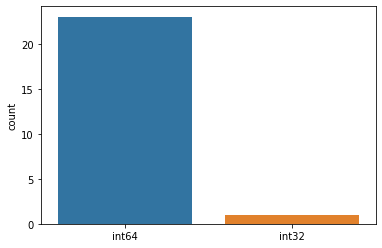

In [17]:
import seaborn as sns
sns.countplot(data.dtypes.map(str))

C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

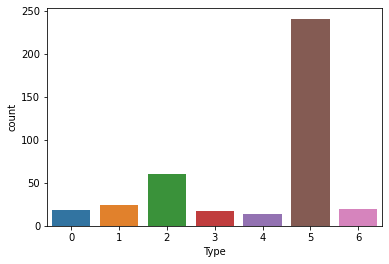

In [18]:
sns.countplot(data["Type"])    # Check Balancing of data 

C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

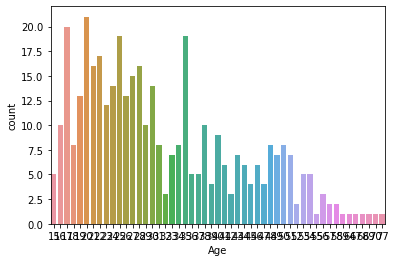

In [19]:
sns.countplot(data["Age"])

C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration', ylabel='count'>

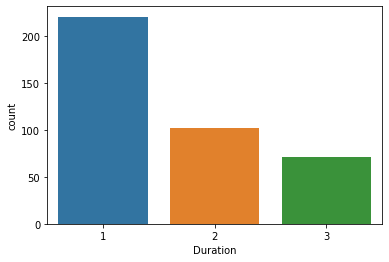

In [20]:
sns.countplot(data["Duration"])

C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='count'>

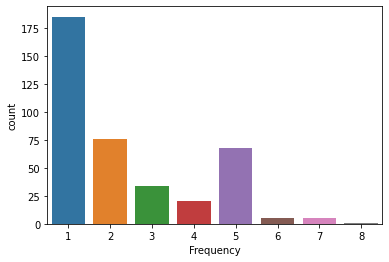

In [21]:
sns.countplot(data["Frequency"])

C:\Users\akshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Intensity', ylabel='count'>

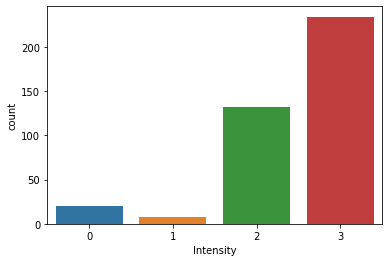

In [22]:
sns.countplot(data["Intensity"])

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

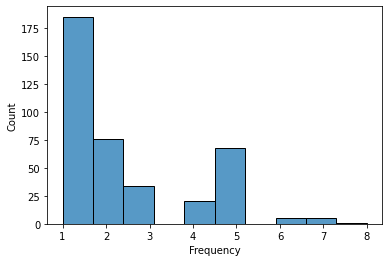

In [23]:
sns.histplot(data["Frequency"])

# Outlier Detection using inter Quantile Range 

In [24]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier counter of the all features")
((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum()

outlier counter of the all features


Age             4
Duration        0
Frequency       1
Location       29
Character      31
Intensity      20
Nausea          5
Vomit           0
Phonophobia     9
Photophobia     8
Visual          9
Sensory        89
Dysphasia      15
Dysarthria      1
Vertigo        50
Tinnitus       24
Hypoacusis      6
Diplopia        2
Defect          6
Ataxia          0
Conscience      7
Paresthesia     3
DPF             0
Type            0
dtype: int64

## Check Skewness of the data

In [25]:
skew=data.skew().sort_values(ascending=False)
skew

Dysarthria     19.849433
Diplopia       13.981858
Paresthesia    11.372110
Defect          7.947494
Hypoacusis      7.947494
Conscience      7.328877
Dysphasia       4.846123
Tinnitus        3.685767
Vertigo         2.250305
Sensory         1.833162
Frequency       0.973740
Age             0.817823
Duration        0.774982
Vomit           0.750744
DPF             0.373164
Visual          0.049236
Ataxia          0.000000
Character      -0.802794
Type           -1.061461
Location       -1.113391
Intensity      -1.707508
Phonophobia    -6.412015
Photophobia    -6.828282
Nausea         -8.740368
dtype: float64

## Check the distribution of the data

In [26]:
kurtosis=data.kurtosis().sort_values(ascending=False)
kurtosis

Dysarthria     394.000000
Diplopia       194.479553
Paresthesia    127.974477
Nausea          74.773581
Defect          61.474689
Hypoacusis      61.474689
Conscience      51.976250
Photophobia     44.853098
Phonophobia     39.313477
Dysphasia       21.594504
Tinnitus        11.643963
Location        10.503276
Character        9.716527
Vertigo          3.079480
Intensity        2.864697
Sensory          2.064884
Age              0.086788
Ataxia           0.000000
Type            -0.265528
Frequency       -0.297291
Visual          -0.479816
Duration        -0.906276
Vomit           -1.443739
DPF             -1.870268
dtype: float64

## Delete irrelevant feature

In [27]:
del data["Ataxia"]

# Data Imbalance (SMOTE)

In [28]:
from imblearn.over_sampling import SMOTE
r1= SMOTE()
x_data,y_data=r1.fit_resample(x,y)

In [29]:
print(Counter(y_data))

Counter({5: 247, 2: 247, 0: 247, 4: 247, 1: 247, 3: 247, 6: 247})


# Feature Scaling 

In [30]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
x_scaled=s.fit_transform(x_data)
print("x_scaled : ",x_scaled)

x_scaled :  [[ 0.10762575 -0.70993907  2.03040785 ... -0.10256785 -0.059011
  -0.81197846]
 [ 1.9872714   2.21961857  2.03040785 ... -0.10256785 -0.059011
  -0.81197846]
 [ 2.26921824  0.75483975 -0.64075454 ... -0.10256785 -0.059011
  -0.81197846]
 ...
 [-0.92617936  0.75483975  1.36261725 ... -0.10256785 -0.059011
  -0.81197846]
 [-0.83219708  2.21961857  2.03040785 ... -0.10256785 -0.059011
   1.23155976]
 [-0.92617936  0.75483975  1.36261725 ... -0.10256785 -0.059011
  -0.81197846]]


In [31]:
x_scaled.reshape(-1,1)

array([[ 0.10762575],
       [-0.70993907],
       [ 2.03040785],
       ...,
       [-0.10256785],
       [-0.059011  ],
       [-0.81197846]])

# Split the data

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.20,random_state=100)

# Logistic Regression for Prediction

In [33]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)
y_pred=l1.predict(x_test)
print(y_pred)
y_score=accuracy_score(y_pred,y_test)*100
print(y_score)

[2 4 3 0 3 1 2 3 1 4 4 3 2 1 6 0 4 2 3 3 1 4 0 5 5 4 3 5 5 5 6 2 1 3 4 0 6
 6 1 2 1 2 5 6 4 1 2 1 6 6 4 5 3 2 3 5 1 0 1 0 3 2 6 5 4 4 6 6 2 6 6 1 1 5
 5 0 2 4 0 3 5 2 0 1 0 5 1 4 0 4 3 4 3 4 3 1 6 1 5 5 0 6 2 3 6 1 4 6 0 5 6
 6 3 3 4 2 3 4 1 1 1 4 6 3 0 3 2 6 4 6 4 3 4 5 4 6 6 0 0 5 3 4 2 0 3 4 4 4
 6 5 2 0 3 1 2 5 6 5 2 0 6 3 4 2 4 6 4 6 2 3 6 4 2 2 5 5 4 6 5 6 5 6 1 0 3
 4 2 1 6 5 2 2 2 2 0 0 3 0 5 5 3 0 3 0 6 1 2 5 6 6 1 3 0 6 5 5 3 4 4 0 4 5
 0 6 4 0 0 4 1 1 0 5 6 1 0 1 3 1 1 1 4 1 6 1 1 3 5 2 2 4 0 2 6 2 2 3 1 0 2
 0 1 0 2 1 6 0 1 4 6 4 2 2 5 6 4 4 2 0 3 2 1 2 5 3 0 2 3 6 3 0 2 2 3 6 5 4
 6 4 1 6 5 2 4 5 3 2 4 5 2 6 3 4 4 4 0 4 1 3 1 5 4 6 3 5 6 6 2 4 2 3 6 1 2
 1 0 0 0 4 2 4 2 2 4 5 6 6]
87.57225433526011


C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Use Cross Validation 

In [34]:
# Model Imbalancing--> Cross_validation
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=100,shuffle=True)
kf.get_n_splits(x_scaled)
print(kf)

KFold(n_splits=5, random_state=100, shuffle=True)


# Logistic Regression for Prediction

In [35]:
from sklearn.linear_model import LogisticRegression
l1=LogisticRegression()
l1.fit(x_train,y_train)
y_pred=l1.predict(x_test)
print(y_pred)
y_score=accuracy_score(y_pred,y_test)*100
print(y_score)

[2 4 3 0 3 1 2 3 1 4 4 3 2 1 6 0 4 2 3 3 1 4 0 5 5 4 3 5 5 5 6 2 1 3 4 0 6
 6 1 2 1 2 5 6 4 1 2 1 6 6 4 5 3 2 3 5 1 0 1 0 3 2 6 5 4 4 6 6 2 6 6 1 1 5
 5 0 2 4 0 3 5 2 0 1 0 5 1 4 0 4 3 4 3 4 3 1 6 1 5 5 0 6 2 3 6 1 4 6 0 5 6
 6 3 3 4 2 3 4 1 1 1 4 6 3 0 3 2 6 4 6 4 3 4 5 4 6 6 0 0 5 3 4 2 0 3 4 4 4
 6 5 2 0 3 1 2 5 6 5 2 0 6 3 4 2 4 6 4 6 2 3 6 4 2 2 5 5 4 6 5 6 5 6 1 0 3
 4 2 1 6 5 2 2 2 2 0 0 3 0 5 5 3 0 3 0 6 1 2 5 6 6 1 3 0 6 5 5 3 4 4 0 4 5
 0 6 4 0 0 4 1 1 0 5 6 1 0 1 3 1 1 1 4 1 6 1 1 3 5 2 2 4 0 2 6 2 2 3 1 0 2
 0 1 0 2 1 6 0 1 4 6 4 2 2 5 6 4 4 2 0 3 2 1 2 5 3 0 2 3 6 3 0 2 2 3 6 5 4
 6 4 1 6 5 2 4 5 3 2 4 5 2 6 3 4 4 4 0 4 1 3 1 5 4 6 3 5 6 6 2 4 2 3 6 1 2
 1 0 0 0 4 2 4 2 2 4 5 6 6]
87.57225433526011


C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
k1=KNeighborsClassifier()
k1.fit(x_train,y_train)
k1_pred=k1.predict(x_test)
print("KNN",k1)
k1_score=accuracy_score(y_test,y_pred)*100
print("Accuracy",k1_score)

KNN KNeighborsClassifier()
Accuracy 87.57225433526011


# SVM

In [37]:
from sklearn.svm import SVC
s1=SVC()
s1.fit(x_train,y_train)
s1_pred=s1.predict(x_test)
print("Predict",s1_pred)
s1_score=accuracy_score(y_test,s1_pred)*100
print("Accuracy",s1_score)

Predict [2 1 3 0 1 1 2 0 1 1 4 0 2 1 6 0 4 2 3 1 1 1 0 0 1 4 0 0 0 0 6 2 1 3 4 0 6
 6 1 2 1 0 4 6 4 1 2 1 6 6 0 0 0 2 0 0 1 0 1 0 3 2 6 0 4 1 6 6 2 6 6 1 1 0
 5 1 0 4 0 1 0 2 1 0 0 1 1 4 0 4 0 1 0 4 3 1 6 1 3 0 1 6 0 0 6 1 4 6 0 0 6
 6 3 3 4 2 3 4 1 1 1 4 6 0 0 0 2 6 1 6 4 3 4 0 1 6 6 0 0 0 0 4 2 1 1 4 4 4
 6 0 2 4 3 1 2 0 6 0 2 0 6 3 1 2 4 6 4 6 1 0 6 4 0 2 0 1 4 6 2 6 0 6 1 0 0
 4 2 1 6 2 2 2 0 2 0 1 3 1 0 3 2 0 0 0 6 1 0 0 6 6 1 0 0 6 0 1 1 4 1 0 1 0
 0 6 4 1 0 4 1 1 0 0 6 1 0 1 1 1 1 1 4 2 6 1 1 3 3 2 2 4 1 0 6 2 1 0 1 1 0
 0 1 0 1 1 6 0 1 1 6 4 0 3 5 6 4 1 0 0 0 1 1 0 0 1 0 1 2 6 3 1 1 2 1 6 0 4
 6 1 1 6 1 2 4 0 0 1 4 0 2 6 0 4 4 4 0 4 1 3 1 0 4 6 1 3 6 6 2 4 2 3 6 1 1
 1 0 0 4 4 2 4 0 2 1 1 6 6]
Accuracy 63.005780346820806


# Ensemble technique
# Voting classifier

In [38]:
from sklearn.ensemble import VotingClassifier
v1=VotingClassifier(estimators=[("Logistic",l1),("KNN",k1),("SVM",s1)])
v1.fit(x_train,y_train)
v1_pred=v1.predict(x_test)
print("prediction",v1_pred)
v1_score=accuracy_score(y_test,v1_pred)*100
print("Accuracy",v1_score)

C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


prediction [2 4 3 0 3 1 2 3 1 4 4 3 2 1 6 0 4 2 3 3 1 4 0 0 1 4 3 5 5 0 6 2 1 3 4 0 6
 6 1 2 1 2 5 6 4 1 2 1 6 6 0 0 3 2 3 0 1 0 1 0 3 2 6 0 4 1 6 6 2 6 6 1 1 0
 5 0 0 4 0 3 5 2 0 0 0 5 1 4 0 4 3 4 3 4 3 1 6 1 2 0 0 6 0 3 6 1 4 6 0 5 6
 6 3 3 4 2 3 4 1 1 1 4 6 3 0 3 2 6 4 6 4 3 4 0 4 6 6 0 0 5 3 4 2 0 3 4 4 4
 6 5 2 0 3 1 2 5 6 0 2 0 6 3 4 2 4 6 4 6 2 3 6 4 0 2 5 1 4 6 2 6 5 6 1 0 3
 4 2 1 6 5 2 2 2 2 0 1 3 1 5 5 3 0 3 0 6 1 0 5 6 6 1 3 0 6 0 1 3 4 4 0 4 5
 0 6 4 0 0 4 1 1 0 0 6 1 0 1 3 1 1 1 4 1 6 1 1 3 5 2 2 4 1 0 6 2 2 3 1 0 0
 0 1 0 2 1 6 0 1 1 6 4 0 2 5 6 4 4 0 0 3 2 1 0 5 3 0 2 3 6 3 0 2 2 3 6 5 4
 6 4 1 6 1 2 4 0 3 2 4 5 2 6 3 4 4 4 0 4 1 3 1 5 4 6 3 3 6 6 2 4 2 3 6 1 2
 1 0 0 0 4 2 4 0 2 4 1 6 6]
Accuracy 85.83815028901735


# Bagging

In [39]:
from sklearn.ensemble import BaggingClassifier
b1=BaggingClassifier(base_estimator=l1,n_estimators=5,random_state=14)
b1.fit(x_train,y_train)
b1_pred=b1.predict(x_test)
print("prediction",b1_pred)
b1_score=accuracy_score(y_test,b1_pred)*100
print("accuracy",b1_score)

C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

prediction [2 4 3 0 3 1 2 3 1 4 4 3 2 1 6 0 4 2 3 3 1 4 0 5 5 4 3 5 5 5 6 2 1 3 4 0 6
 6 1 2 1 2 5 6 4 1 2 1 6 6 4 5 3 2 3 5 0 0 1 0 3 2 6 5 4 4 6 6 2 6 6 1 1 5
 5 0 2 4 0 3 5 2 0 1 0 5 1 4 0 4 3 4 3 4 3 1 6 1 5 5 0 6 2 3 6 1 4 6 0 5 6
 6 3 3 4 2 3 4 1 1 1 4 6 3 0 3 2 6 4 6 4 3 4 5 4 6 6 0 0 5 3 4 2 0 3 4 4 4
 6 5 2 0 3 1 2 5 6 5 2 0 6 3 4 2 4 6 4 6 2 3 6 4 2 2 5 4 4 6 5 6 5 6 0 0 3
 4 2 1 6 5 2 2 2 2 0 0 3 0 5 5 3 0 3 0 6 1 2 5 6 6 1 3 0 6 5 5 3 4 4 0 4 0
 0 6 4 0 0 4 1 1 0 5 6 1 0 1 3 1 1 1 4 1 6 1 1 3 5 2 2 4 0 2 6 2 2 3 1 0 2
 0 1 0 2 1 6 0 1 2 6 4 2 2 5 6 4 4 2 0 3 2 1 2 5 3 0 2 3 6 3 0 2 2 3 6 5 4
 6 4 1 6 5 2 4 5 3 2 4 5 2 6 3 4 4 4 0 4 1 3 1 5 4 6 3 5 6 6 2 4 2 3 6 1 2
 1 0 0 0 4 2 4 2 2 4 4 6 6]
accuracy 86.9942196531792


C:\Users\akshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
R=RandomForestClassifier(n_estimators=5,random_state=3)
R.fit(x_train,y_train)
R_pred=R.predict(x_test)
print("predict value",R_pred)
R_score=accuracy_score(y_test,R_pred)*100
print("Accuracy score",R_score)

predict value [2 4 3 0 3 1 2 3 1 4 4 3 2 1 6 0 4 2 3 3 1 4 0 0 4 4 3 5 5 4 6 2 1 3 4 3 6
 6 1 2 1 3 5 6 5 1 2 1 6 6 4 5 3 2 3 5 1 0 1 0 3 2 6 5 4 5 6 6 2 6 6 0 0 0
 5 0 0 4 0 3 0 2 0 5 0 5 0 4 0 4 3 4 3 4 3 1 6 1 5 5 0 6 3 3 6 1 4 6 5 0 6
 6 3 3 4 2 3 5 1 1 1 4 6 3 0 3 2 6 4 6 4 3 4 0 4 6 6 0 3 5 3 5 2 0 3 4 4 4
 6 5 2 0 3 1 2 5 6 5 2 0 6 3 4 2 4 6 5 6 2 3 6 4 0 2 5 4 4 6 5 6 5 6 1 0 3
 5 2 1 6 5 2 2 2 2 0 1 3 4 5 5 3 0 3 0 6 1 3 5 6 6 0 3 0 6 5 4 3 5 4 0 4 5
 0 6 4 0 0 4 1 1 0 5 6 1 0 1 3 1 1 1 4 1 6 1 1 3 5 2 2 4 0 5 6 2 2 3 1 0 0
 0 1 0 2 1 6 0 1 2 6 4 0 3 5 6 4 4 0 0 3 2 1 3 5 3 0 2 3 6 3 0 2 2 3 6 1 5
 6 4 1 6 5 2 4 5 3 2 5 5 2 6 3 4 4 4 0 4 1 3 1 5 4 6 3 5 6 6 2 5 2 3 6 0 2
 0 0 0 0 4 2 4 3 2 4 4 6 6]
Accuracy score 94.50867052023122


# In the above analysis We use many  models there is Random forest give the more accuracy as compare to all the models so Random forest is the best model .